In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
df.columns=df.columns.str.strip()

### DATA PREPROCESSING

### handling missing values

In [8]:
df.shape

(4269, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [10]:
df=df.fillna(method='ffill')

C:\Users\kanha\AppData\Local\Temp\ipykernel_18412\1718901248.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill')


### encode categorical variables

In [11]:
# there are three categorical columns
# all are nominal
# so to encode this we will use pd.get_dummies function
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [12]:
# there is a extra space in each column. so we will strip it
df['education']

0            Graduate
1        Not Graduate
2            Graduate
3            Graduate
4        Not Graduate
            ...      
4264         Graduate
4265     Not Graduate
4266     Not Graduate
4267     Not Graduate
4268         Graduate
Name: education, Length: 4269, dtype: object

In [13]:
df=pd.get_dummies(df,columns=['education','self_employed','loan_status'],dtype='int64',drop_first=True)

In [14]:
df.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


### feature and label separation

In [16]:
X=df.drop(columns='loan_status_ Rejected')
y=df['loan_status_ Rejected']

In [17]:
X.shape

(4269, 12)

In [18]:
y.shape

(4269,)

### train_test_split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train.shape

(3415, 12)

In [21]:
X_test.shape

(854, 12)

In [22]:
y_train.shape

(3415,)

In [23]:
y_test.shape

(854,)

### feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
X_test_scaled

array([[-0.36395305,  1.51250774,  0.12027804, ...,  0.72735662,
        -0.99736803, -1.01504731],
       [-0.79695025, -0.25599737,  0.29812247, ...,  0.54176071,
        -0.99736803, -1.01504731],
       [-1.50363436,  0.33350433,  1.61417128, ...,  0.51082806,
        -0.99736803, -1.01504731],
       ...,
       [-0.54368774,  1.51250774,  0.19141581, ...,  0.88201987,
         1.00263891,  0.98517575],
       [-1.20952306,  0.92300603, -1.01792634, ..., -1.09766982,
         1.00263891, -1.01504731],
       [-0.84515183, -0.84549907, -0.76894413, ..., -0.97393921,
         1.00263891, -1.01504731]])

In [26]:
X_train_scaled

array([[-0.38682838,  1.51250774,  1.00950021, ...,  1.16041374,
         1.00263891, -1.01504731],
       [-0.80430304, -1.43500078,  1.61417128, ...,  0.88201987,
         1.00263891,  0.98517575],
       [-1.59840356, -0.84549907, -1.51589075, ..., -1.31419838,
        -0.99736803, -1.01504731],
       ...,
       [ 0.7708264 ,  0.92300603,  1.25848241, ...,  0.13963624,
         1.00263891,  0.98517575],
       [ 1.32636998, -0.25599737,  0.68938023, ...,  1.4388076 ,
         1.00263891,  0.98517575],
       [-1.0526637 ,  0.92300603,  0.40482913, ..., -0.10782497,
        -0.99736803, -1.01504731]])

### Build And Train ANN

In [27]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [29]:
model=Sequential()
model.add(Dense(16,activation='relu',input_dim=X_train_scaled.shape[1],kernel_regularizer=regularizers.l2(0.03)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(8,activation='relu',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

c:\Users\kanha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 48 (192.00 B)

### compile the model

In [31]:
callback=EarlyStopping(monitor='val_loss',
                       mode='auto',
                       min_delta=0.00001,
                       patience=10,
                       baseline=None,
                       restore_best_weights=False,
                       start_from_epoch=0,
                       verbose=1)

In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
history=model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=1000,callbacks=callback,batch_size=10)

Epoch 1/1000
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5160 - loss: 1.5217 - val_accuracy: 0.7277 - val_loss: 1.0578
Epoch 2/1000
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6647 - loss: 1.0863 - val_accuracy: 0.8433 - val_loss: 0.7984
Epoch 3/1000
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7544 - loss: 0.8693 - val_accuracy: 0.9078 - val_loss: 0.6074
Epoch 4/1000
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8080 - loss: 0.7077 - val_accuracy: 0.9327 - val_loss: 0.4850
Epoch 5/1000
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8514 - loss: 0.5538 - val_accuracy: 0.9414 - val_loss: 0.3916
Epoch 6/1000
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8582 - loss: 0.4910 - val_accuracy: 0.9341 - val_loss: 0.3492
Epoch 7/1000
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8532 - loss: 0.4499 - val_accuracy: 0.9429 - val_loss: 0.2963
Epoch 8/1000
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8551 - loss: 0.4159 - 

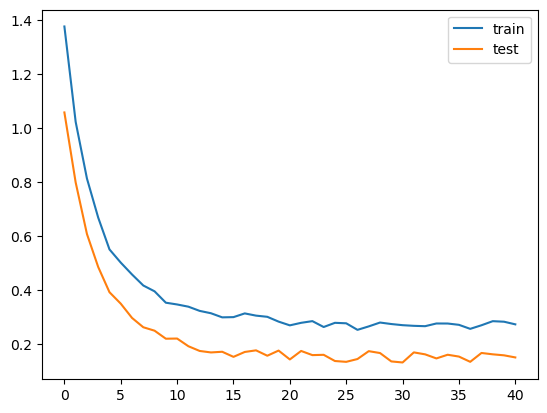

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

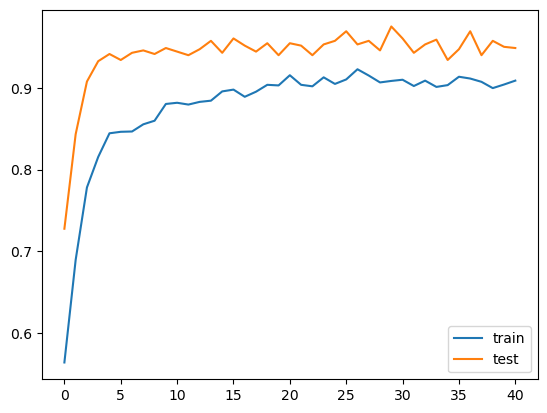

In [35]:

plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

### evaluate the model

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [37]:
y_pred=(model.predict(X_test_scaled)>0.5).astype('int32')
y_pred

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [38]:
print(accuracy_score(y_test,y_pred))

0.9344262295081968


In [39]:
confusion_matrix(y_test,y_pred)

array([[511,  25],
       [ 31, 287]], dtype=int64)

In [40]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.95      0.95       536\n           1       0.92      0.90      0.91       318\n\n    accuracy                           0.93       854\n   macro avg       0.93      0.93      0.93       854\nweighted avg       0.93      0.93      0.93       854\n'

### save the model for furthe deplyment in streamlit

In [41]:
# Save model
model.save("loan_model.h5")

# Save scaler
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler,f)

In [42]:
import tensorflow as tf
print(tf.__version__)

import ml_dtypes
print(ml_dtypes.__version__)


2.17.0
0.5.1
